In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv("movies_final_unique.csv")
df.head()

,Movie_Name,Budget,Duration,Votes,Year,GenreScore,Rating
0,Inception,108,192,1769313,2004,7.915,6.8
1,Interstellar,67,176,1164208,1994,7.564,8.7
2,The Dark Knight,234,201,460963,1999,6.233,7.0
3,Avatar,106,170,2829138,2005,8.073,8.0
4,Titanic,94,137,2678088,1992,8.825,6.0


In [3]:
df.describe()

,Budget,Duration,Votes,Year,GenreScore,Rating
count,86.000000,86.000000,8.600000e+01,86.000000,86.000000,86.000000
mean,138.744186,156.116279,1.230988e+06,2003.046512,7.879570,6.184884
std,86.536927,35.633896,8.918367e+05,10.351365,1.064878,1.762786
min,13.000000,91.000000,7.108700e+04,1985.000000,6.021000,4.200000
25%,68.500000,126.000000,4.342158e+05,1994.000000,7.173500,4.200000
50%,126.000000,156.500000,1.081530e+06,2004.000000,7.642500,6.000000
75%,223.750000,188.750000,1.965924e+06,2011.000000,8.810750,7.875000
max,291.000000,207.000000,2.937581e+06,2023.000000,9.857000,9.600000


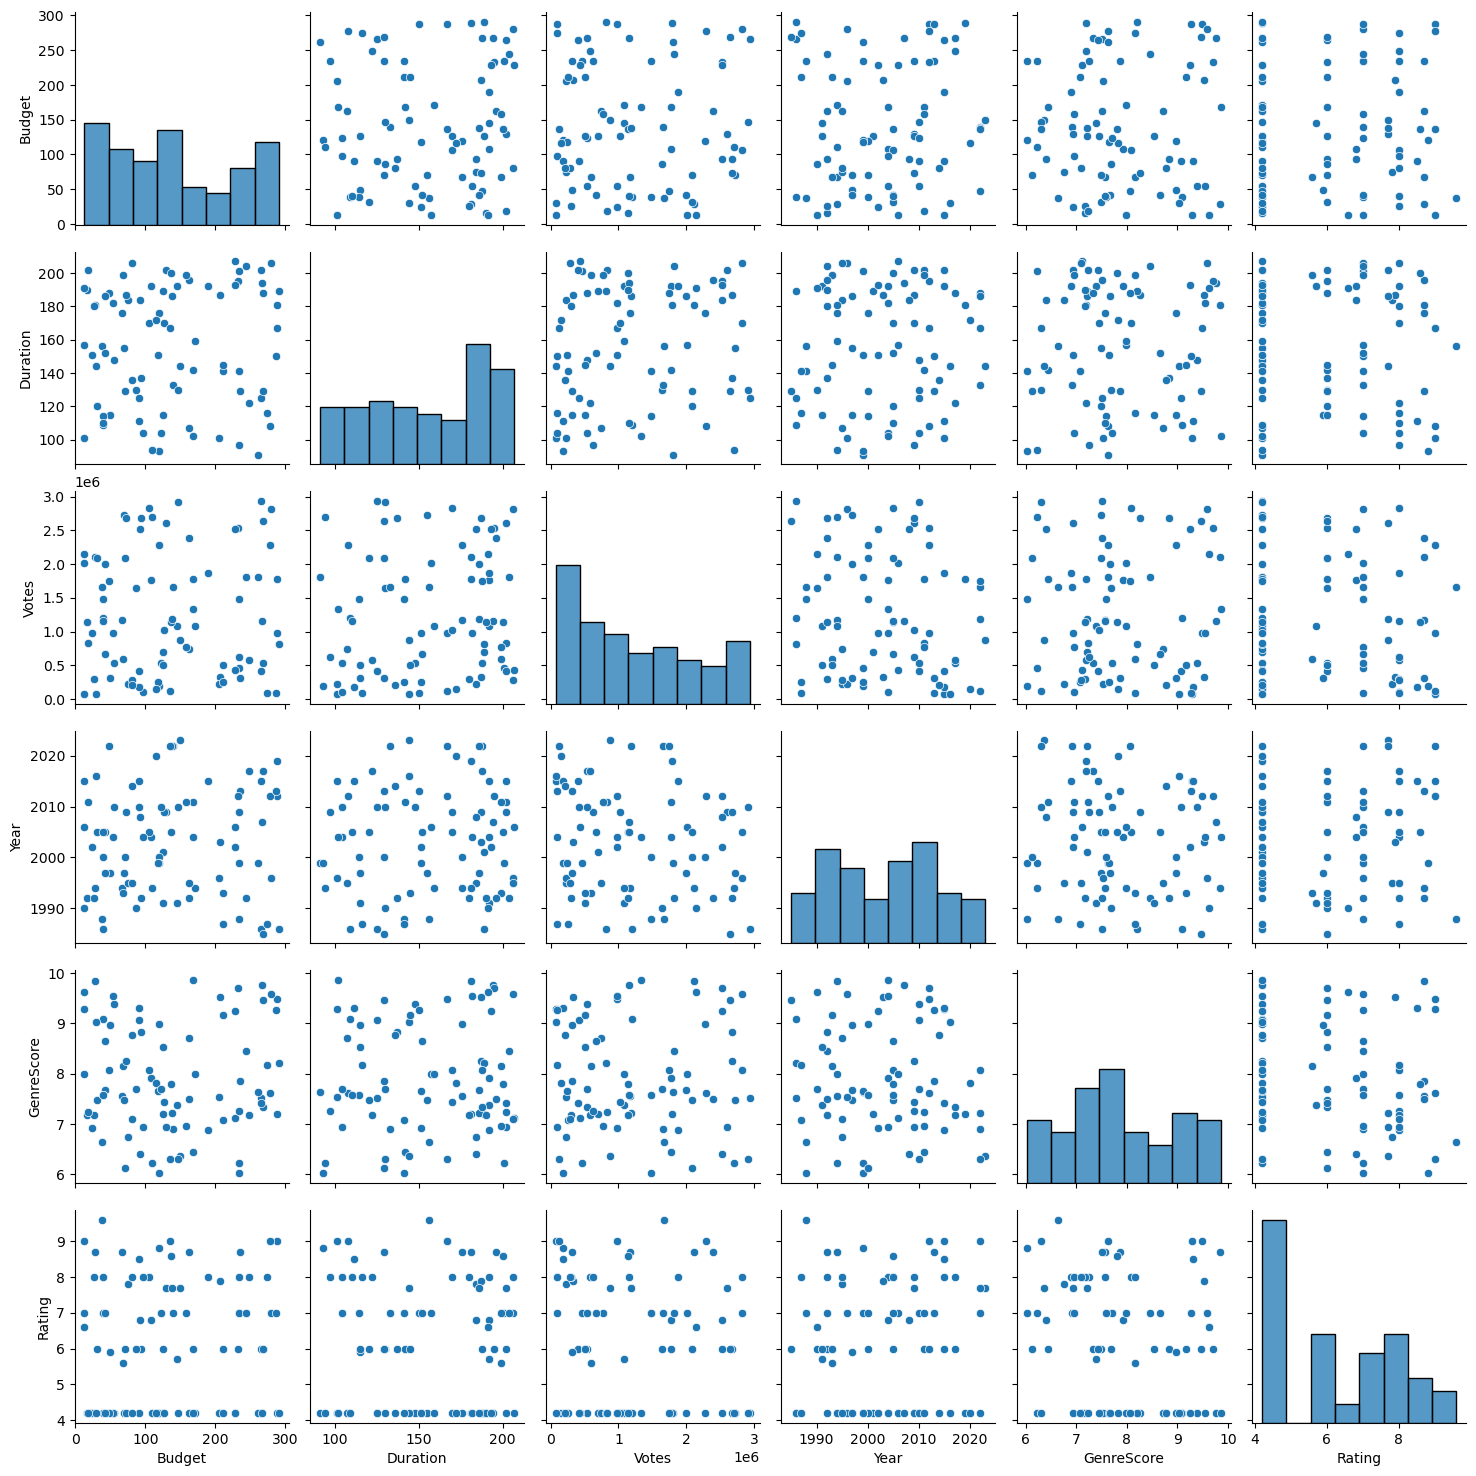

In [4]:
import seaborn as sns
sns.pairplot(df)

In [5]:
X=df[['Budget','Duration','Votes','Year','GenreScore']]
y=df['Rating']

In [6]:
X.head()

,Budget,Duration,Votes,Year,GenreScore
0,108,192,1769313,2004,7.915
1,67,176,1164208,1994,7.564
2,234,201,460963,1999,6.233
3,106,170,2829138,2005,8.073
4,94,137,2678088,1992,8.825


In [7]:
y.head()

0    6.8
1    8.7
2    7.0
3    8.0
4    6.0
Name: Rating, dtype: float64

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=43)

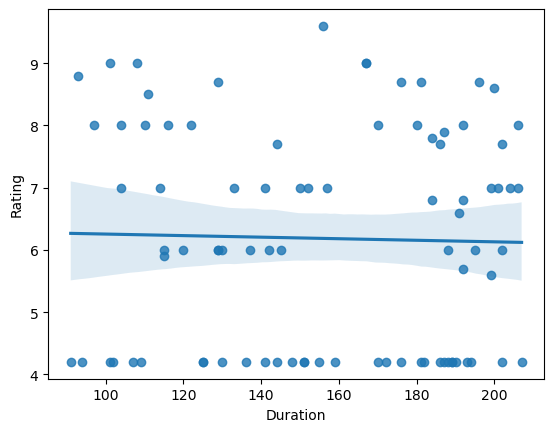

In [9]:
import seaborn as sns
sns.regplot(x='Duration', y='Rating', data=df)
plt.show()

In [10]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [11]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [12]:
X_train

array([[ 1.57883280e+00, -1.04860009e+00, -1.31756583e+00,
        -1.55627437e+00,  2.01861625e-01],
       [ 8.51971204e-01, -2.48352654e-01, -8.56441105e-01,
        -9.29849469e-01,  1.15572015e+00],
       [ 8.51971204e-01, -3.58731611e-01, -1.14690874e+00,
        -1.55627437e+00, -8.38016209e-01],
       [-1.43245095e+00,  8.27842179e-02,  8.05488370e-01,
         4.27404493e-01,  3.17345530e-02],
       [ 1.04810846e+00,  1.46252118e+00, -9.50620893e-01,
         4.27404493e-01, -7.96918096e-01],
       [-7.74814269e-01,  2.75947393e-02,  1.59391666e+00,
        -5.12232866e-01, -4.53796641e-01],
       [ 2.98171894e-01,  1.15897905e+00,  1.22307067e+00,
        -1.03425362e+00, -4.36592780e-01],
       [-5.90214499e-01, -6.62273743e-01,  3.97228765e-01,
        -1.24306192e+00, -2.54996467e-01],
       [ 1.12887086e+00, -6.89868482e-01, -1.07249984e+00,
         1.15823355e+00, -9.15597857e-02],
       [-1.28715074e-01, -1.07619483e+00, -8.58126582e-01,
        -1.13865777e+00

In [13]:
X_test

array([[-0.01334022,  0.35873161, -1.29049416,  2.09787091, -1.58351686],
       [ 0.39047178,  0.1379737 , -0.22974561, -0.82544532,  0.02791147],
       [ 1.11733337,  1.29695275, -0.91115327, -0.30342456, -1.64850923],
       [-1.39783849,  0.99341061, -0.15796397, -1.03425362, -0.74530651],
       [-1.09786387, -0.05518948, -0.67717182,  0.32300034,  0.66732165],
       [-0.79788924,  1.24176327, -0.76298841, -0.92984947,  0.1865693 ],
       [-1.43245095, -1.46252118, -1.33339249,  1.36704185,  1.26850102],
       [ 0.60968401,  1.04860009,  0.65144923,  1.36704185, -1.02056829],
       [ 1.52114537, -0.68986848,  1.49794404, -1.76508268,  1.44245117],
       [-1.23631369, -0.27594739, -1.34262223,  1.471446  ,  1.02573542],
       [-0.80942673,  0.60708426, -0.13288433, -0.82544532, -0.37637927],
       [ 1.62498274, -1.26935801,  1.11074461,  1.0538294 , -0.31712152],
       [ 1.77497005,  0.96581588, -0.51878563, -1.66067853,  0.23722512],
       [-0.24408993,  0.49670531, -1.2

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
regression=LinearRegression()
regression.fit(X_train,y_train)

LinearRegression()

In [16]:
from sklearn.model_selection import cross_val_score

In [17]:
validation_score=cross_val_score(regression,X_train,y_train,scoring='neg_mean_squared_error',cv=3)
validation_score

array([-3.39059713, -3.99021895, -2.9801329 ])

In [18]:
y_predict=regression.predict(X_test)

In [19]:
y_predict

array([6.49209569, 6.25614469, 6.85478697, 6.31077307, 5.97015231,
       6.36538977, 5.6977913 , 6.23363702, 5.76665223, 5.91070049,
       6.2399421 , 5.8491712 , 6.5980006 , 6.25897381, 6.24188227,
       6.08391122, 6.105021  , 5.85684063, 6.14432011, 6.19103162,
       6.48009545, 6.2579408 ])

In [20]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
mse=mean_squared_error(y_test,y_predict)
mae=mean_absolute_error(y_test,y_predict)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

3.3741422115606095
1.6066851817207253
1.836883831808808


In [21]:
from sklearn.metrics import r2_score
r2=r2_score(y_test,y_predict)
r2

-0.05900747063746925

In [22]:
new_movie = [[120, 145, 500000, 2024, 8.7]]
new_movie_scaled = scaler.transform(new_movie)
predicted_rating = regression.predict(new_movie_scaled)
print("Predicted Movie Rating:", round(predicted_rating[0], 2))


Predicted Movie Rating: 5.92


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [23]:
df.head()


,Movie_Name,Budget,Duration,Votes,Year,GenreScore,Rating
0,Inception,108,192,1769313,2004,7.915,6.8
1,Interstellar,67,176,1164208,1994,7.564,8.7
2,The Dark Knight,234,201,460963,1999,6.233,7.0
3,Avatar,106,170,2829138,2005,8.073,8.0
4,Titanic,94,137,2678088,1992,8.825,6.0
